In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
pd.DataFrame(data)
 
#实现归一化
scaler = MinMaxScaler()                      #实例化
scaler = scaler.fit(data)                    #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(data)              #通过接口导出结果
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [4]:
result_ = scaler.fit_transform(data)                #训练和导出结果一步达成
result_

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [5]:
scaler.inverse_transform(result)                    #将归一化后的结果逆转

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [6]:
#使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中
 
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler(feature_range=[5,10])         #依然实例化
result = scaler.fit_transform(data)                 #fit_transform一步导出结果
result

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [8]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = StandardScaler()                           #实例化
scaler.fit(data)                                    #fit，本质是生成均值和方差

StandardScaler()

In [9]:
scaler.mean_                                        #查看均值的属性mean_

array([-0.125,  9.   ])

In [10]:
scaler.var_                                         #查看方差的属性var_

array([ 0.546875, 35.      ])

In [13]:
x_std = scaler.transform(data)                      #通过接口导出结果

In [14]:
x_std.mean()                                #导出的结果是一个数组，用mean()查看均值

0.0

In [15]:
x_std.std()                                         #用std()查看方差

1.0

In [16]:
scaler.fit_transform(data)                      #使用fit_transform(data)一步达成结果


array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [17]:
scaler.inverse_transform(x_std)                 #使用inverse_transform逆转标准化


array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [20]:
data = pd.read_csv("../../data/Narrativedata.csv", index_col=0)#index_col=0将第0列作为索引，不写则认为第0列为特征
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [22]:
#填补年龄
 
Age = data.loc[:,"Age"].values.reshape(-1,1)        #sklearn当中特征矩阵必须是二维
Age[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [23]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()                              #实例化，默认均值填补
imp_median = SimpleImputer(strategy="median")           #用中位数填补
imp_0 = SimpleImputer(strategy="constant",fill_value=0) #用0填补
 
imp_mean = imp_mean.fit_transform(Age)              #fit_transform一步完成调取结果
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)

In [28]:
imp_mean[:10]

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ]])

In [30]:
imp_median[:10]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [28.],
       [54.],
       [ 2.],
       [27.],
       [14.]])

In [31]:
imp_0[:10]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [ 0.],
       [54.],
       [ 2.],
       [27.],
       [14.]])

In [32]:
data.loc[:,"Age"] = imp_median
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [33]:
#使用众数填补Embarked
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)
imp_mode = SimpleImputer(strategy = "most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [37]:
data_ = pd.read_csv("../../data/Narrativedata.csv", index_col=0)
data_.loc[:,"Age"] = data_.loc[:,"Age"].fillna(data_.loc[:,"Age"].median())
data_.dropna(axis=0,inplace=True)
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


In [38]:
from sklearn.preprocessing import LabelEncoder
 
y = data_.iloc[:,-1]                         #要输入的是标签，不是特征矩阵，所以允许一维
 
le = LabelEncoder()                         #实例化
le = le.fit(y)                              #导入数据
label = le.transform(y)                     #transform接口调取结果
 
le.classes_                                 #属性.classes_查看标签中究竟有多少类别

array(['No', 'Unknown', 'Yes'], dtype=object)

In [39]:
label                                       #查看获取的结果label

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

In [42]:
print(le.fit_transform(y))                        #也可以直接fit_transform一步到位
 
print(le.inverse_transform(le.fit_transform(y)))               #使用inverse_transform可以逆转

[0 2 2 2 0 0 0 0 2 2 1 2 0 0 0 1 0 2 0 2 1 2 2 2 0 1 0 0 2 0 0 2 2 0 0 0 2
 0 0 2 0 0 0 1 2 0 0 2 0 0 0 0 2 2 0 2 2 0 2 0 0 0 0 0 2 2 0 2 0 0 0 0 0 2
 1 0 1 2 2 0 2 2 0 2 2 0 0 2 0 0 0 0 0 0 0 1 2 2 0 0 0 0 0 0 0 2 2 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 1 0 0 2 0 0 2 0 0 0 1 1 2 0 0 0 2 0 0
 1 0 1 1 0 0 0 2 0 0 0 0 2 0 0 0 2 2 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0 0 1 2 0
 2 2 0 0 2 0 2 1 2 2 0 0 1 0 0 0 0 0 2 0 0 2 2 2 1 2 1 0 0 2 2 0 2 0 2 0 0
 0 2 0 2 0 0 0 2 1 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 1 0 2 2 2 2 2
 0 2 0 1 0 0 1 2 2 1 0 2 2 0 2 2 0 0 1 1 0 0 0 2 0 0 2 0 2 2 2 2 0 0 0 0 0
 0 2 2 2 2 1 2 0 2 2 2 0 2 2 2 0 0 0 2 2 1 2 2 0 1 2 2 0 2 0 1 2 2 2 0 1 0
 2 0 0 2 1 0 2 2 0 0 0 2 2 2 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 2 2 2 1 2
 0 0 0 0 2 2 0 0 0 2 2 0 2 0 0 0 2 0 2 2 2 0 2 2 0 0 0 0 2 2 1 0 0 0 1 0 2
 0 0 0 0 2 0 2 0 1 2 0 0 0 0 0 0 0 0 2 2 0 2 2 2 2 0 0 2 0 2 0 0 2 0 0 2 2
 2 2 2 2 2 0 0 0 2 1 2 0 2 2 0 2 1 0 0 0 0 0 0 0 1 1 0 2 2 0 0 1 0 0 2 0 0
 0 2 2 1 2 0 0 1 0 0 1 0 

In [43]:
from sklearn.preprocessing import OrdinalEncoder
 
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [44]:
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_


[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [45]:
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
 
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,No
1,38.0,0.0,0.0,Yes
2,26.0,0.0,2.0,Yes
3,35.0,0.0,2.0,Yes
4,35.0,1.0,2.0,No


In [50]:
from sklearn.preprocessing import OneHotEncoder
data_ = pd.read_csv("../../data/Narrativedata.csv", index_col=0)
data_.loc[:,"Age"] = data_.loc[:,"Age"].fillna(data_.loc[:,"Age"].median())
data_.dropna(axis=0, inplace=True)
X = data_.iloc[:, 1:-1]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       889 non-null    object
 1   Embarked  889 non-null    object
dtypes: object(2)
memory usage: 20.8+ KB


In [54]:
enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [55]:
OneHotEncoder(categories='auto').fit_transform(X).toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [56]:
pd.DataFrame(enc.inverse_transform(result))

,0,1
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
884,male,S
885,female,S
886,female,S
887,male,C


In [57]:
enc.get_feature_names() #返回每一个经过哑变量后生成稀疏矩阵列的名字

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [62]:
result.shape

(889, 5)

In [74]:
newdata = pd.concat([data_,pd.DataFrame(result)],axis=1)
 
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,No,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,Yes,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,Yes,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,Yes,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,No,0.0,1.0,0.0,0.0,1.0


In [75]:
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
 
newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
 
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,No,0.0,1.0,0.0,0.0,1.0
1,38.0,Yes,1.0,0.0,1.0,0.0,0.0
2,26.0,Yes,1.0,0.0,0.0,0.0,1.0
3,35.0,Yes,1.0,0.0,0.0,0.0,1.0
4,35.0,No,0.0,1.0,0.0,0.0,1.0


In [85]:
data_2 = data_.copy()
data_2.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [90]:
from sklearn.preprocessing import Binarizer
X = data_2.iloc[:,0].values.reshape(-1,1)
transformer = Binarizer(threshold=30).fit_transform(X)
data_2.iloc[:,0] = transformer
data_2.head()

,Age,Sex,Embarked,Survived
0,0.0,male,S,No
1,1.0,female,C,Yes
2,0.0,female,S,Yes
3,1.0,female,S,Yes
4,1.0,male,S,No


In [92]:
from sklearn.preprocessing import KBinsDiscretizer
X = data_.iloc[:, 0].values.reshape(-1, 1)
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(X)
set(est.fit_transform(X).ravel())

{0.0, 1.0, 2.0}

In [93]:
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
#查看转换后分的箱：变成了哑变量
est.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [2]:
import pandas as pd
data = pd.read_csv("../../data/digit recognizor.csv")

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

X.shape

(42000, 784)

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.feature_selection import VarianceThreshold #方差过滤
selector = VarianceThreshold()  #默认threshold=0

X_var0 = selector.fit_transform(X)

pd.DataFrame(X_var0).head()

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
import numpy as np

X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

np.median(X.var().values)

1352.286703180131

In [11]:
X_fsvar.shape

(42000, 392)

In [15]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsvar,y,cv=5).mean()

0.9390476190476191

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar, y)
X_fschi.shape

(42000, 300)

In [17]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0.9344761904761905

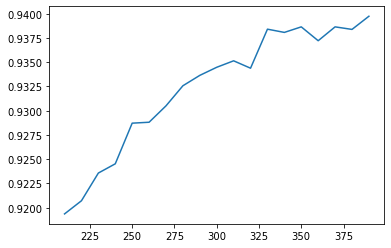

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
 
score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(390,200,-10),score)
plt.show()

In [19]:
from sklearn.feature_selection import mutual_info_classif as MIC
 
result = MIC(X_fsvar,y)#互信息法
 
k = result.shape[0] - sum(result <= 0)
#所有特征的互信息量估计都大于0，因此所有特征都与标签相关。

In [22]:
result

array([0.06995857, 0.08768348, 0.10454937, 0.11360082, 0.1118681 ,
       0.10291597, 0.08579577, 0.0503642 , 0.07330982, 0.09984169,
       0.11894412, 0.14012017, 0.16235186, 0.16022367, 0.15736943,
       0.14011842, 0.09345198, 0.06047795, 0.03958461, 0.02483887,
       0.06995315, 0.09494427, 0.12787981, 0.15261931, 0.17990455,
       0.20272768, 0.22563627, 0.23295508, 0.21573622, 0.17911641,
       0.13838343, 0.10829844, 0.07639466, 0.05811843, 0.04653604,
       0.04116489, 0.06134826, 0.07969886, 0.10046924, 0.12145702,
       0.13637814, 0.15129205, 0.16297887, 0.18223053, 0.1937994 ,
       0.17052947, 0.15100809, 0.13601662, 0.11170005, 0.1003761 ,
       0.08319866, 0.07134821, 0.06163069, 0.04476692, 0.06478644,
       0.07197455, 0.08892247, 0.09559877, 0.10324991, 0.10906272,
       0.10460406, 0.11047363, 0.12407946, 0.11441813, 0.11264669,
       0.11630684, 0.11931494, 0.10530736, 0.10022097, 0.08066614,
       0.069756  , 0.03782475, 0.05311092, 0.06772445, 0.07054

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_ = RFC(n_estimators =10,random_state=0)
 
X_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(X,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，
#是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [24]:
X_embedded.shape

(42000, 47)

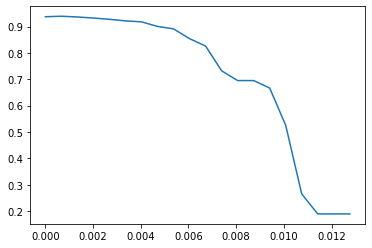

In [25]:
import numpy as np
import matplotlib.pyplot as plt

RFC_.fit(X,y).feature_importances_
 
threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)
 
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [26]:
X_embedded = SelectFromModel(RFC_,threshold=0.00067).fit_transform(X,y)
X_embedded.shape

(42000, 324)

In [27]:
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.9391190476190475

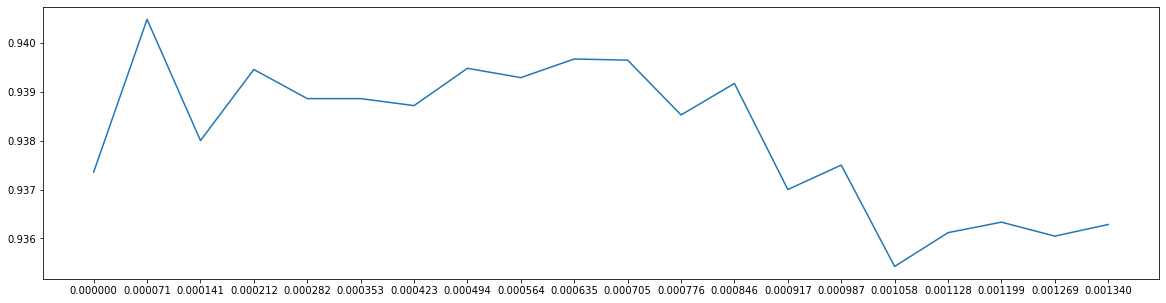

In [28]:
score2 = []
for i in np.linspace(0,0.00134,20):
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0,0.00134,20))
plt.show()

In [29]:
np.linspace(0,0.00134,20)

array([0.00000000e+00, 7.05263158e-05, 1.41052632e-04, 2.11578947e-04,
       2.82105263e-04, 3.52631579e-04, 4.23157895e-04, 4.93684211e-04,
       5.64210526e-04, 6.34736842e-04, 7.05263158e-04, 7.75789474e-04,
       8.46315789e-04, 9.16842105e-04, 9.87368421e-04, 1.05789474e-03,
       1.12842105e-03, 1.19894737e-03, 1.26947368e-03, 1.34000000e-03])

In [30]:
X_embedded = SelectFromModel(RFC_,threshold=7.05263158e-05).fit_transform(X,y)
X_embedded.shape

(42000, 462)

In [31]:
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.9404761904761905

In [32]:
cross_val_score(RFC(n_estimators=100,random_state=0),X_embedded,y,cv=5).mean()

0.9647380952380953

In [33]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators =10, random_state=0)
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)

In [34]:
selector.support_.sum()

340

In [35]:
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [36]:
X_wrapper = selector.transform(X)
 
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()

0.9379761904761905

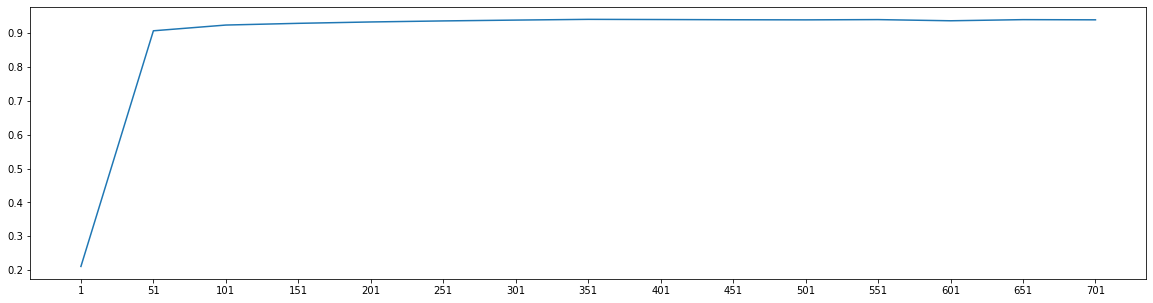

In [37]:

score = []
for i in range(1,751,50):
    X_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()